In [15]:
# FIRST QUESTION - Alternative approach
# find the 10 countries with most projects

In [16]:
# import libraries

import pandas as pd
import json 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# import data

original_json_df = pd.read_json('data/world_bank_projects.json')

In [23]:
# select 'countryshortname' and 'project_name' columns
# count projects ('project_name' column) for each country ('countryshortname' column)

projects_by_country = original_json_df.groupby('countryshortname')['project_name'].count()
#projects_by_country

In [19]:
# sort countries by number of projects
# then select 10 countries with the most projects
# and remove the row with value 'Africa' since it is not a country

projects_by_country_sorted_without_Africa = projects_by_country.sort_values().nlargest(11).drop('Africa')
#projects_by_country_sorted_without_Africa

countryshortname
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Mozambique            11
Burkina Faso           9
Name: project_name, dtype: int64

In [21]:
# change column names in above table (pandas Series)

projects_by_country_sorted_without_Africa.index.name='country'
ten_countries = projects_by_country_sorted_without_Africa.reset_index(name='number_of_projects')

# reset index, start with 1

ten_countries.index += 1 
ten_countries

,country,number_of_projects
1,China,19
2,Indonesia,19
3,Vietnam,17
4,India,16
5,"Yemen, Republic of",13
6,Morocco,12
7,Bangladesh,12
8,Nepal,12
9,Mozambique,11
10,Burkina Faso,9


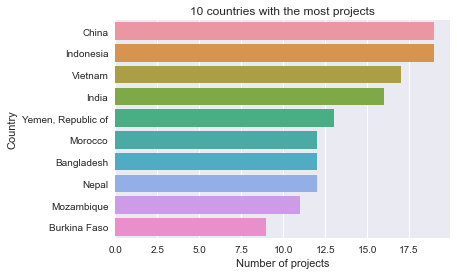

In [22]:
sns.set(style="darkgrid")
sns.barplot(ten_countries.number_of_projects, ten_countries.country)
#ax.set_xlabel('Number of projects')
plt.title('10 countries with the most projects')
plt.xlabel('Number of projects')
plt.ylabel('Country')

plt.show()